In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.signal import spectrogram


duration = 10.0          
sample_rate = 44100     
frequency = 19000       


t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
signal = 0.5 * np.sin(2 * np.pi * frequency * t)


write("/Users/shamit/Documents/Projects/RA/cobas/cobas/near_ultrasound.wav", sample_rate, (signal * 32767).astype(np.int16))




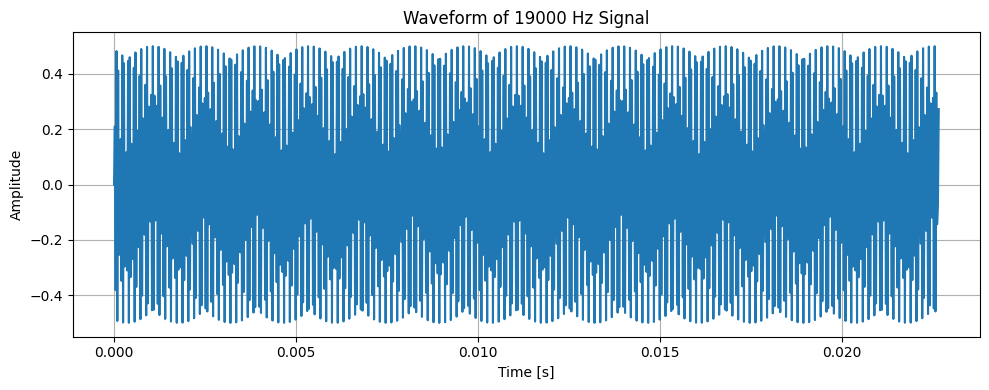

In [8]:

plt.figure(figsize=(10, 4))
plt.plot(t[:1000], signal[:1000])  # Show first 1000 samples
plt.title(f"Waveform of {frequency} Hz Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

(0.0, 22050.0)

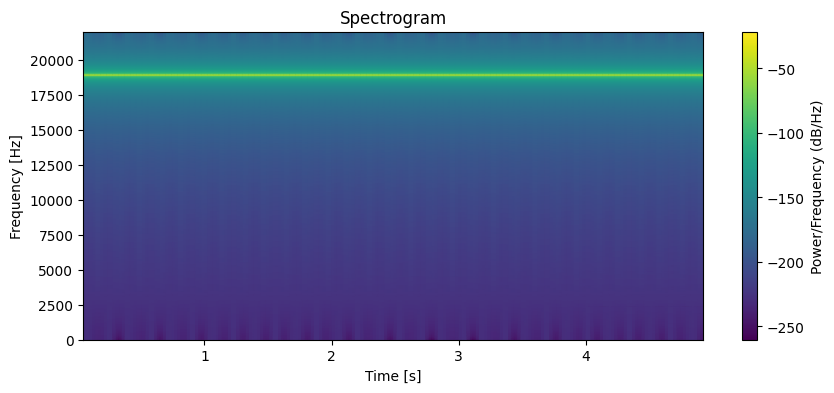

In [13]:

# f, t_spec, Sxx = spectrogram(signal, sample_rate)   
f, t_spec, Sxx = spectrogram(signal, sample_rate, window='hann', nperseg=4096, noverlap=2048)


plt.figure(figsize=(10, 4))
plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title("Spectrogram")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.ylim(0, 22050) 

# plt.axhline(y=frequency, color='red', linestyle='--', label=f'{frequency} Hz')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [12]:
# !pip install sounddevice
# !pip install scipy
!pip install soundfile

  Using cached soundfile-0.13.1-py2.py3-none-macosx_11_0_arm64.whl (1.1 MB)

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import numpy as np
import sounddevice as sd
from scipy.signal import chirp

# ------------------------------
# USER SETTINGS

# ------------------------------
fs = 44100          # Sample rate (Hz)
duration = 2.0      # Duration in seconds
f_start = 3000      # Sweep start frequency (Hz)
f_end = 16000       # Sweep end frequency (Hz)
amplitude = 0.5     # 0.0 - 1.0 (keep below 0.8 to avoid distortion)
repeat_count = 5    # How many times to play
gap_seconds = 2     # Pause between plays

# ------------------------------
# GENERATE PROBE SWEEP
# ------------------------------
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
signal = chirp(t, f0=f_start, f1=f_end, t1=duration, method='logarithmic')
signal *= amplitude

# Fade in/out (avoid clicks)
fade_samples = int(fs * 0.02)  # 20 ms fade
fade_in = np.linspace(0, 1, fade_samples)
fade_out = np.linspace(1, 0, fade_samples)

signal[:fade_samples] *= fade_in
signal[-fade_samples:] *= fade_out

# ------------------------------
# PLAYBACK LOOP
# ------------------------------
print(f"Playing {repeat_count} sweeps from {f_start/1000:.1f} kHz to {f_end/1000:.1f} kHz...")
for i in range(repeat_count):
    sd.play(signal, fs)
    sd.wait()
    print(f"Played sweep {i+1}/{repeat_count}")
    sd.sleep(int(gap_seconds * 1000))

print("Done. Now label the iPhone recordings for dataset.")


Playing 5 sweeps from 3.0 kHz to 16.0 kHz...
Played sweep 1/5
Played sweep 2/5
Played sweep 3/5
Played sweep 4/5
Played sweep 5/5
Done. Now label the iPhone recordings for dataset.


In [2]:
import numpy as np
import sounddevice as sd
from scipy.signal import chirp
import soundfile as sf  # Added to save probe sweep

# ------------------------------
# USER SETTINGS
# ------------------------------
fs = 44100          # Sample rate (Hz)
duration = 2.0      # Duration in seconds
f_start = 3000      # Sweep start frequency (Hz)
f_end = 16000       # Sweep end frequency (Hz)
amplitude = 0.5     # 0.0 - 1.0 (keep below 0.8 to avoid distortion)
repeat_count = 5    # How many times to play
gap_seconds = 2     # Pause between plays
probe_file = '/Users/shamit/Documents/Projects/RA/cobas/cobas/probe_signal.wav'  # File to save probe sweep

# ------------------------------
# GENERATE PROBE SWEEP
# ------------------------------
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
signal = chirp(t, f0=f_start, f1=f_end, t1=duration, method='logarithmic')
signal *= amplitude

# Fade in/out (avoid clicks)
fade_samples = int(fs * 0.02)  # 20 ms fade
fade_in = np.linspace(0, 1, fade_samples)
fade_out = np.linspace(1, 0, fade_samples)

signal[:fade_samples] *= fade_in
signal[-fade_samples:] *= fade_out

# ------------------------------
# SAVE PROBE SWEEP
# ------------------------------
sf.write(probe_file, signal, fs)
print(f"Probe sweep saved as {probe_file}")

# ------------------------------
# PLAYBACK LOOP
# ------------------------------
print(f"Playing {repeat_count} sweeps from {f_start/1000:.1f} kHz to {f_end/1000:.1f} kHz...")
for i in range(repeat_count):
    sd.play(signal, fs)
    sd.wait()
    print(f"Played sweep {i+1}/{repeat_count}")
    sd.sleep(int(gap_seconds * 1000))

print("Done. Now label the iPhone recordings for dataset.")


Probe sweep saved as /Users/shamit/Documents/Projects/RA/cobas/cobas/probe_signal.wav
Playing 5 sweeps from 3.0 kHz to 16.0 kHz...
Played sweep 1/5
Played sweep 2/5
Played sweep 3/5
Played sweep 4/5
Played sweep 5/5
Done. Now label the iPhone recordings for dataset.


Converted near_ultrasonic.m4a to near_ultrasound_recording.wav


/var/folders/f0/1ms4q4394tq6z6n6kxg9vvw80000gp/T/ipykernel_67067/4088200812.py:53: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/var/folders/f0/1ms4q4394tq6z6n6kxg9vvw80000gp/T/ipykernel_67067/4088200812.py:54: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(spectrogram_file)
/Users/shamit/Documents/Projects/RA/cobas/cobas/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


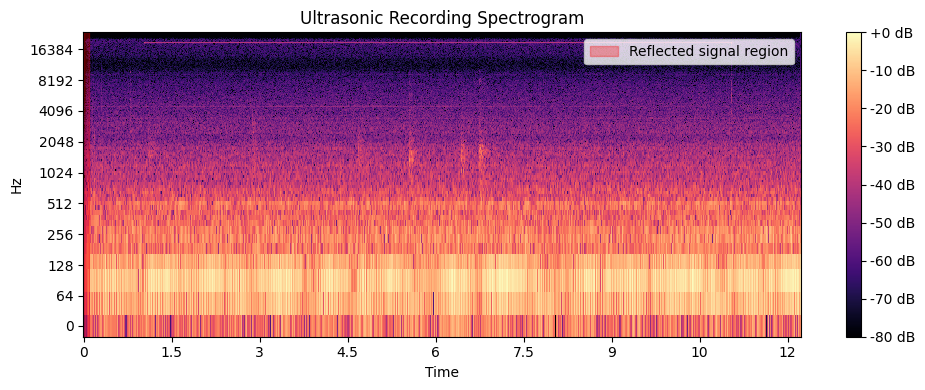

Spectrogram saved as ultrasound_spectrogram.png


In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa
import librosa.display
from pydub import AudioSegment

# ------------------------------
# USER SETTINGS
# ------------------------------
recording_m4a = "near_ultrasonic.m4a"  # Recorded from iPhone
recording_wav = "near_ultrasound_recording.wav"
spectrogram_file = "ultrasound_spectrogram.png"

# ------------------------------
# CONVERT M4A TO WAV
# ------------------------------
audio = AudioSegment.from_file(recording_m4a, format="m4a")
audio.export(recording_wav, format="wav")
print(f"Converted {recording_m4a} to {recording_wav}")

# ------------------------------
# LOAD AUDIO
# ------------------------------
recording, fs = sf.read(recording_wav)

# Ensure mono
if recording.ndim > 1:
    recording = recording.mean(axis=1)

# ------------------------------
# GENERATE SPECTROGRAM
# ------------------------------
n_fft = 1024
hop_length = 256
D = librosa.stft(recording, n_fft=n_fft, hop_length=hop_length)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# ------------------------------
# PLOT SPECTROGRAM WITH HIGHLIGHT
# ------------------------------
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=fs, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Ultrasonic Recording Spectrogram")

# Highlight a region where reflections are expected (adjust based on distance)
start_time = 0.01  # seconds
end_time   = 0.1
plt.axvspan(start_time, end_time, color='red', alpha=0.3, label="Reflected signal region")

plt.legend()
plt.tight_layout()
plt.savefig(spectrogram_file)
plt.show()

print(f"Spectrogram saved as {spectrogram_file}")


Converted near_ultrasonic.m4a to near_ultrasound_recording.wav
Detected direct signal at 0.1144 s


/var/folders/f0/1ms4q4394tq6z6n6kxg9vvw80000gp/T/ipykernel_67067/2666746711.py:59: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/var/folders/f0/1ms4q4394tq6z6n6kxg9vvw80000gp/T/ipykernel_67067/2666746711.py:60: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(spectrogram_file)
/Users/shamit/Documents/Projects/RA/cobas/cobas/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


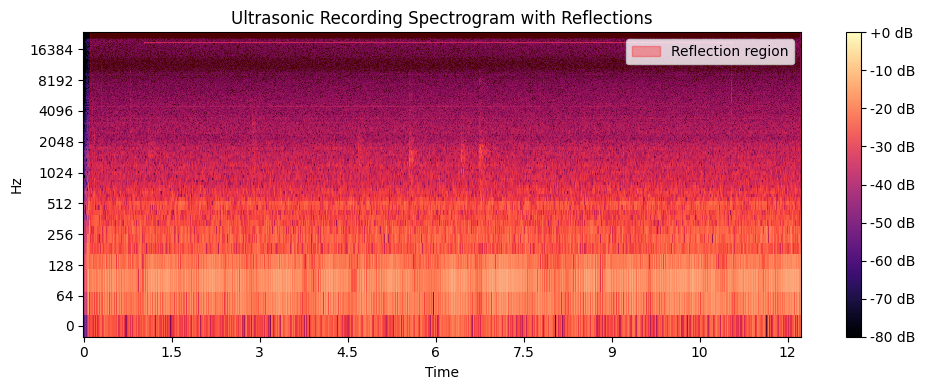

Spectrogram saved as ultrasound_spectrogram_upgraded.png


In [3]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa
import librosa.display
from pydub import AudioSegment

# ------------------------------
# USER SETTINGS
# ------------------------------
recording_m4a = "near_ultrasonic.m4a"  # Recorded from iPhone
recording_wav = "near_ultrasound_recording.wav"
spectrogram_file = "ultrasound_spectrogram_upgraded.png"

# ------------------------------
# CONVERT M4A TO WAV
# ------------------------------
audio = AudioSegment.from_file(recording_m4a, format="m4a")
audio.export(recording_wav, format="wav")
print(f"Converted {recording_m4a} to {recording_wav}")

# ------------------------------
# LOAD AUDIO
# ------------------------------
recording, fs = sf.read(recording_wav)

# Ensure mono
if recording.ndim > 1:
    recording = recording.mean(axis=1)

# ------------------------------
# GENERATE SPECTROGRAM
# ------------------------------
n_fft = 1024
hop_length = 256
D = librosa.stft(recording, n_fft=n_fft, hop_length=hop_length)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# ------------------------------
# DETECT DIRECT SIGNAL
# ------------------------------
# Using simple threshold on waveform to find first strong peak
threshold = 0.3 * np.max(np.abs(recording))
direct_idx = np.argmax(np.abs(recording) > threshold)
direct_time = direct_idx / fs  # Convert to seconds
print(f"Detected direct signal at {direct_time:.4f} s")

# ------------------------------
# PLOT SPECTROGRAM WITH REFLECTION HIGHLIGHT
# ------------------------------
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=fs, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Ultrasonic Recording Spectrogram with Reflections")

# Highlight everything after direct signal as potential reflection region
plt.axvspan(direct_time, recording.shape[0]/fs, color='red', alpha=0.3, label="Reflection region")
plt.legend()
plt.tight_layout()
plt.savefig(spectrogram_file)
plt.show()

print(f"Spectrogram saved as {spectrogram_file}")


Number of pulses to fit 3.0s: 19
Multi-pulse ultrasonic signal saved as 'ultrasonic_multi_pulse_3s.wav'


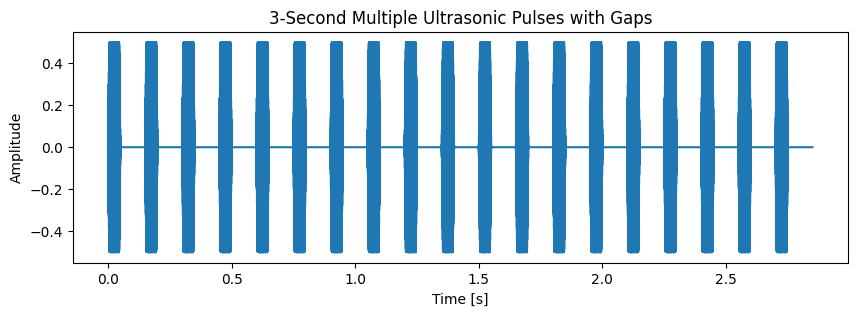

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# ------------------------------
# USER SETTINGS
# ------------------------------
sample_rate = 44100       # Sampling rate
pulse_duration = 0.05     # Each pulse duration in seconds (50 ms)
gap_duration = 0.1        # Gap between pulses in seconds (100 ms)
total_duration = 3.0      # Total signal duration ~3 seconds
start_freq = 15000        # Start frequency of sweep (Hz)
end_freq = 19000          # End frequency of sweep (Hz)
amplitude = 0.5           # Signal amplitude

# ------------------------------
# GENERATE SINGLE PULSE (linear chirp)
# ------------------------------
t_pulse = np.linspace(0, pulse_duration, int(sample_rate * pulse_duration), endpoint=False)
pulse = amplitude * np.sin(2 * np.pi * ((start_freq + (end_freq - start_freq) * t_pulse / pulse_duration / 2) * t_pulse))

# Apply fade in/out to reduce clicks
fade_samples = int(0.005 * sample_rate)  # 5 ms fade
window = np.ones_like(pulse)
window[:fade_samples] = np.linspace(0, 1, fade_samples)
window[-fade_samples:] = np.linspace(1, 0, fade_samples)
pulse *= window

# ------------------------------
# CALCULATE NUMBER OF PULSES TO FIT 3 SECONDS
# ------------------------------
pulse_plus_gap = pulse_duration + gap_duration
num_pulses = int(total_duration / pulse_plus_gap)
print(f"Number of pulses to fit {total_duration}s: {num_pulses}")

# ------------------------------
# CREATE MULTIPLE PULSES WITH GAPS
# ------------------------------
gap = np.zeros(int(sample_rate * gap_duration))
multi_pulse_signal = np.array([])

for _ in range(num_pulses):
    multi_pulse_signal = np.concatenate([multi_pulse_signal, pulse, gap])

# ------------------------------
# SAVE WAV FILE
# ------------------------------
output_file = "ultrasonic_multi_pulse_3s.wav"
write(output_file, sample_rate, (multi_pulse_signal * 32767).astype(np.int16))
print(f"Multi-pulse ultrasonic signal saved as '{output_file}'")

# ------------------------------
# PLOT WAVEFORM
# ------------------------------
t_total = np.linspace(0, len(multi_pulse_signal)/sample_rate, len(multi_pulse_signal), endpoint=False)
plt.figure(figsize=(10, 3))
plt.plot(t_total, multi_pulse_signal)
plt.title("3-Second Multiple Ultrasonic Pulses with Gaps")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


Converted /Users/shamit/Documents/Projects/RA/cobas/cobas/acoustic_dataset/full/recoreded_us_3sec_1.m4a to recoreded_us_3sec_1.wav
Recording resampled to 44100 Hz


/var/folders/f0/1ms4q4394tq6z6n6kxg9vvw80000gp/T/ipykernel_67067/2920018196.py:100: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/shamit/Documents/Projects/RA/cobas/cobas/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


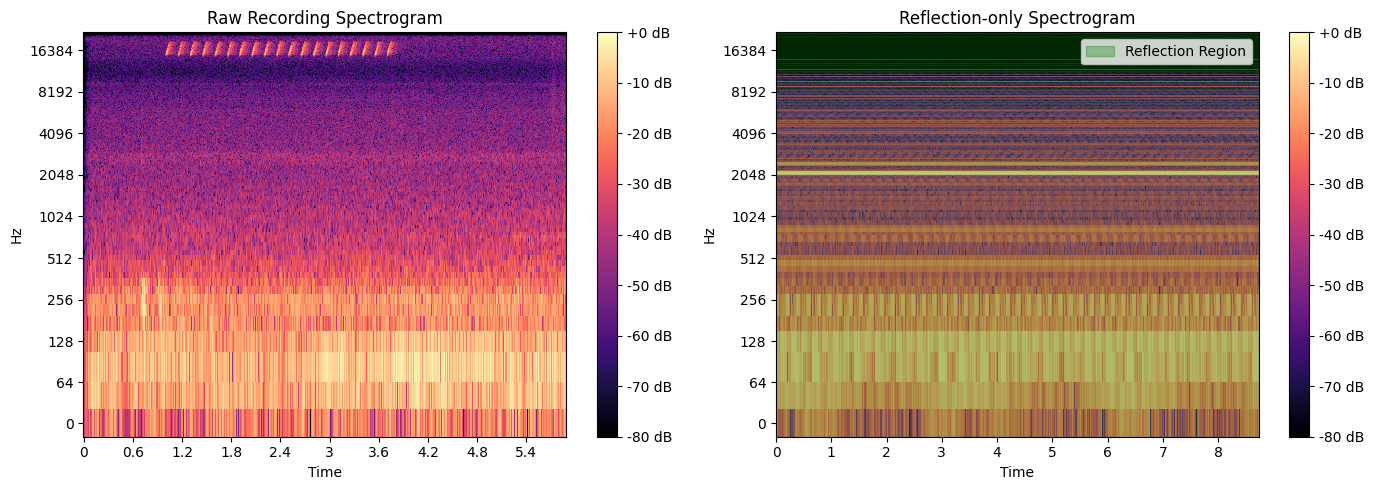

Reflection spectrogram saved as spectrogram_reflections.png


<Figure size 640x480 with 0 Axes>

In [8]:
# What this pipeline does:

# Converts your iPhone recording to .wav.

# Extracts the impulse response using your probe → isolates reflections.

# Removes the first few milliseconds to discard the direct path.

# Plots raw vs reflection spectrograms side by side, highlighting the reflection region.
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa
import librosa.display
from pydub import AudioSegment

# ------------------------------
# USER SETTINGS
# ------------------------------
probe_file = "ultrasonic_multi_pulse_3s.wav"    # The multi-pulse WAV you generated
recording_m4a = "/Users/shamit/Documents/Projects/RA/cobas/cobas/acoustic_dataset/full/recoreded_us_3sec_1.m4a"          # iPhone recording with bottle
recording_wav = "recoreded_us_3sec_1.wav"
direct_path_ms = 5        # Remove first 5 ms as direct path
spectrogram_raw_file = "spectrogram_raw.png"
spectrogram_ref_file = "spectrogram_reflections.png"

# ------------------------------
# CONVERT M4A TO WAV
# ------------------------------
audio = AudioSegment.from_file(recording_m4a, format="m4a")
audio.export(recording_wav, format="wav")
print(f"Converted {recording_m4a} to {recording_wav}")

# ------------------------------
# LOAD AUDIO
# ------------------------------
probe, fs_probe = sf.read(probe_file)
recording, fs_rec = sf.read(recording_wav)

# Resample if necessary
if fs_rec != fs_probe:
    import librosa
    recording = librosa.resample(recording.astype(float), orig_sr=fs_rec, target_sr=fs_probe)
    fs_rec = fs_probe
    sf.write("recording_resampled.wav", recording, fs_rec)
    print(f"Recording resampled to {fs_probe} Hz")

# Ensure mono
if recording.ndim > 1:
    recording = recording.mean(axis=1)
if probe.ndim > 1:
    probe = probe.mean(axis=1)

# ------------------------------
# EXTRACT IMPULSE RESPONSE (reflections)
# ------------------------------
n = len(recording) + len(probe) - 1
H = np.fft.fft(recording, n) / (np.fft.fft(probe, n) + 1e-12)  # avoid division by 0
impulse_response = np.fft.ifft(H).real

# ------------------------------
# REMOVE DIRECT PATH
# ------------------------------
direct_samples = int(fs_rec * direct_path_ms / 1000)
impulse_response[:direct_samples] = 0

# Normalize reflections
impulse_response /= np.max(np.abs(impulse_response))

# ------------------------------
# PLOT SPECTROGRAMS SIDE BY SIDE
# ------------------------------
n_fft = 1024
hop_length = 256

# Raw spectrogram
D_raw = librosa.stft(recording, n_fft=n_fft, hop_length=hop_length)
S_db_raw = librosa.amplitude_to_db(np.abs(D_raw), ref=np.max)

# Reflection spectrogram
D_ref = librosa.stft(impulse_response, n_fft=n_fft, hop_length=hop_length)
S_db_ref = librosa.amplitude_to_db(np.abs(D_ref), ref=np.max)

plt.figure(figsize=(14, 5))

plt.colorbar(format='%+2.0f dB')
plt.title("Raw Recording Spectrogram")

# Reflections
plt.subplot(1, 2, 2)
librosa.display.specshow(S_db_ref, sr=fs_rec, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Reflection-only Spectrogram")
plt.axvspan(direct_path_ms/1000, len(impulse_response)/fs_rec, color='green', alpha=0.3, label="Reflection Region")
plt.legend()

plt.tight_layout()
plt.show()

# Save reflection spectrogram
plt.savefig(spectrogram_ref_file)
print(f"Reflection spectrogram saved as {spectrogram_ref_file}")


Converted /Users/shamit/Documents/Projects/RA/cobas/cobas/acoustic_dataset/full/recoreded_us_3sec_1.m4a to bottle_recording.wav
Recording resampled to 44100 Hz
Detected direct signal at 0.0000 s


/var/folders/f0/1ms4q4394tq6z6n6kxg9vvw80000gp/T/ipykernel_67067/1302476967.py:79: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/var/folders/f0/1ms4q4394tq6z6n6kxg9vvw80000gp/T/ipykernel_67067/1302476967.py:80: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(spectrogram_ref_file)
/Users/shamit/Documents/Projects/RA/cobas/cobas/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


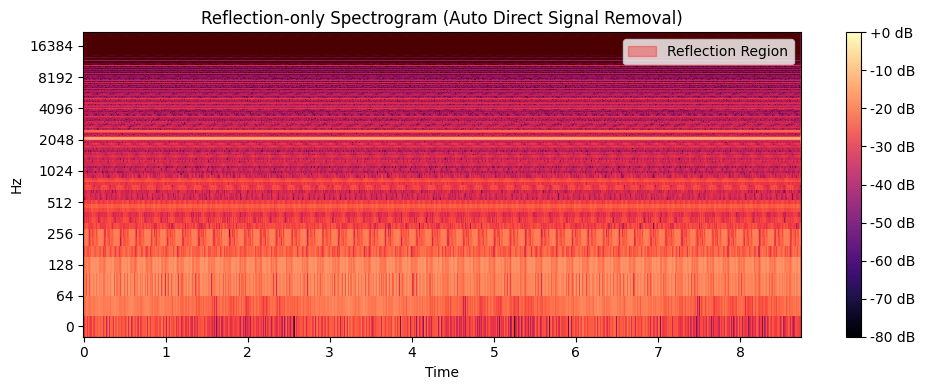

Reflection spectrogram saved as spectrogram_reflections_auto.png


In [11]:
# import numpy as np
# import soundfile as sf
# import matplotlib.pyplot as plt
# import librosa
# import librosa.display
# from pydub import AudioSegment

# # ------------------------------
# # USER SETTINGS
# # ------------------------------
# probe_file = "ultrasonic_multi_pulse_3s.wav"    # The multi-pulse WAV you generated
# recording_m4a = "/Users/shamit/Documents/Projects/RA/cobas/cobas/acoustic_dataset/full/recoreded_us_3sec_1.m4a"   
# recording_wav = "bottle_recording.wav"
# spectrogram_ref_file = "spectrogram_reflections_auto.png"
# threshold_factor = 0.3  # Fraction of max amplitude to detect direct signal

# # ------------------------------
# # CONVERT M4A TO WAV
# # ------------------------------
# audio = AudioSegment.from_file(recording_m4a, format="m4a")
# audio.export(recording_wav, format="wav")
# print(f"Converted {recording_m4a} to {recording_wav}")

# # ------------------------------
# # LOAD AUDIO
# # ------------------------------
# probe, fs_probe = sf.read(probe_file)
# recording, fs_rec = sf.read(recording_wav)

# # Resample if necessary
# if fs_rec != fs_probe:
#     import librosa
#     recording = librosa.resample(recording.astype(float), orig_sr=fs_rec, target_sr=fs_probe)
#     fs_rec = fs_probe
#     sf.write("recording_resampled.wav", recording, fs_rec)
#     print(f"Recording resampled to {fs_probe} Hz")

# # Ensure mono
# if recording.ndim > 1:
#     recording = recording.mean(axis=1)
# if probe.ndim > 1:
#     probe = probe.mean(axis=1)

# # ------------------------------
# # EXTRACT IMPULSE RESPONSE (reflections)
# # ------------------------------
# n = len(recording) + len(probe) - 1
# H = np.fft.fft(recording, n) / (np.fft.fft(probe, n) + 1e-12)
# impulse_response = np.fft.ifft(H).real

# # ------------------------------
# # AUTOMATIC DIRECT SIGNAL DETECTION
# # ------------------------------
# threshold = threshold_factor * np.max(np.abs(impulse_response))
# direct_idx = np.argmax(np.abs(impulse_response) > threshold)
# direct_time = direct_idx / fs_rec
# print(f"Detected direct signal at {direct_time:.4f} s")

# # Remove direct path
# impulse_response[:direct_idx] = 0

# # Normalize reflections
# impulse_response /= np.max(np.abs(impulse_response))

# # ------------------------------
# # PLOT REFLECTION SPECTROGRAM
# # ------------------------------
# n_fft = 1024
# hop_length = 256
# D_ref = librosa.stft(impulse_response, n_fft=n_fft, hop_length=hop_length)
# S_db_ref = librosa.amplitude_to_db(np.abs(D_ref), ref=np.max)

# plt.figure(figsize=(10, 4))
# librosa.display.specshow(S_db_ref, sr=fs_rec, hop_length=hop_length, x_axis='time', y_axis='log')
# plt.colorbar(format='%+2.0f dB')
# plt.title("Reflection-only Spectrogram (Auto Direct Signal Removal)")
# plt.axvspan(direct_time, len(impulse_response)/fs_rec, color='red', alpha=0.3, label="Reflection Region")
# plt.legend()
# plt.tight_layout()
# plt.show()
# plt.savefig(spectrogram_ref_file)

# print(f"Reflection spectrogram saved as {spectrogram_ref_file}")


Number of pulses to fit 15.0s: 99
Added 3.0 s silent delay at the end
Multi-pulse ultrasonic signal with delay saved as 'ultrasonic_multi_pulse_15s_with_delay.wav'


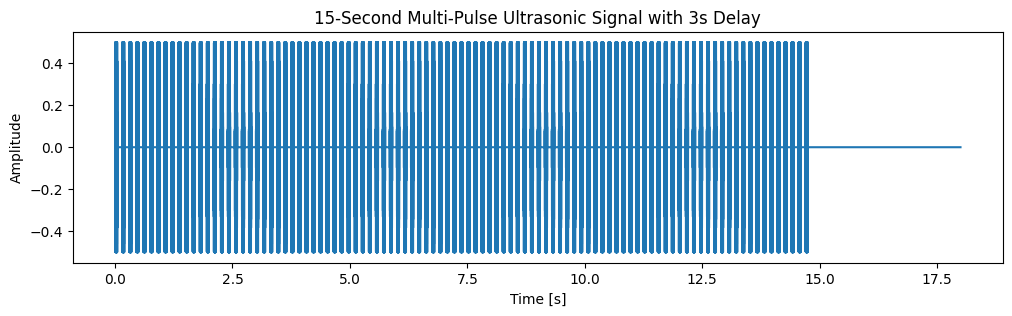

In [15]:
### Final

import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# ------------------------------
# USER SETTINGS
# ------------------------------
sample_rate = 44100       # Sampling rate
pulse_duration = 0.05     # Each pulse duration in seconds (50 ms)
gap_duration = 0.1        # Gap between pulses in seconds (100 ms)
total_duration = 15.0     # Total signal duration ~15 seconds
start_freq = 15000        # Start frequency of sweep (Hz)
end_freq = 19000          # End frequency of sweep (Hz)
amplitude = 0.5           # Signal amplitude
playback_delay = 3.0      # Delay after each playback in seconds

# ------------------------------
# GENERATE SINGLE PULSE (linear chirp)
# ------------------------------
t_pulse = np.linspace(0, pulse_duration, int(sample_rate * pulse_duration), endpoint=False)
pulse = amplitude * np.sin(2 * np.pi * ((start_freq + (end_freq - start_freq) * t_pulse / pulse_duration / 2) * t_pulse))

# Apply fade in/out to reduce clicks
fade_samples = int(0.005 * sample_rate)  # 5 ms fade
window = np.ones_like(pulse)
window[:fade_samples] = np.linspace(0, 1, fade_samples)
window[-fade_samples:] = np.linspace(1, 0, fade_samples)
pulse *= window

# ------------------------------
# CALCULATE NUMBER OF PULSES TO FIT TOTAL DURATION
# ------------------------------
pulse_plus_gap = pulse_duration + gap_duration
num_pulses = int(total_duration / pulse_plus_gap)
print(f"Number of pulses to fit {total_duration}s: {num_pulses}")

# ------------------------------
# CREATE MULTIPLE PULSES WITH GAPS
# ------------------------------
gap = np.zeros(int(sample_rate * gap_duration))
multi_pulse_signal = np.array([])

for _ in range(num_pulses):
    multi_pulse_signal = np.concatenate([multi_pulse_signal, pulse, gap])

# Trim or pad to make exact total duration
desired_samples = int(total_duration * sample_rate)
if len(multi_pulse_signal) > desired_samples:
    multi_pulse_signal = multi_pulse_signal[:desired_samples]
else:
    multi_pulse_signal = np.pad(multi_pulse_signal, (0, desired_samples - len(multi_pulse_signal)), 'constant')

# ------------------------------
# ADD 3-SECOND SILENT DELAY
# ------------------------------
delay_samples = int(playback_delay * sample_rate)
multi_pulse_signal_with_delay = np.concatenate([multi_pulse_signal, np.zeros(delay_samples)])
print(f"Added {playback_delay} s silent delay at the end")

# ------------------------------
# SAVE WAV FILE
# ------------------------------
output_file = "ultrasonic_multi_pulse_15s_with_delay.wav"
write(output_file, sample_rate, (multi_pulse_signal_with_delay * 32767).astype(np.int16))
print(f"Multi-pulse ultrasonic signal with delay saved as '{output_file}'")

# ------------------------------
# PLOT WAVEFORM
# ------------------------------
t_total = np.linspace(0, len(multi_pulse_signal_with_delay)/sample_rate, len(multi_pulse_signal_with_delay), endpoint=False)
plt.figure(figsize=(12, 3))
plt.plot(t_total, multi_pulse_signal_with_delay)
plt.title("15-Second Multi-Pulse Ultrasonic Signal with 3s Delay")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

